In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# EDA

In [2]:
data=pd.read_csv(R'F:\job\New folder\Walmart.csv')

In [3]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [4]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
def seasonName(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'
    
data['Date'] = pd.to_datetime(data['Date'], format = "%d-%m-%Y")
data['Month_Name'] = data['Date'].dt.month_name()
data['Season'] = data['Date'].dt.month.apply(seasonName)
data['Week'] = data['Date'].dt.isocalendar().week.astype('int32')

In [8]:
data.head(20)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month_Name,Season,Week
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,February,Winter,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,February,Winter,6
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,February,Winter,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,February,Winter,8
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,March,Spring,9
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106,March,Spring,10
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,March,Spring,11
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,March,Spring,12
8,1,2010-04-02,1594968.28,0,62.27,2.719,210.820450,7.808,April,Spring,13
9,1,2010-04-09,1545418.53,0,65.86,2.770,210.622857,7.808,April,Spring,14


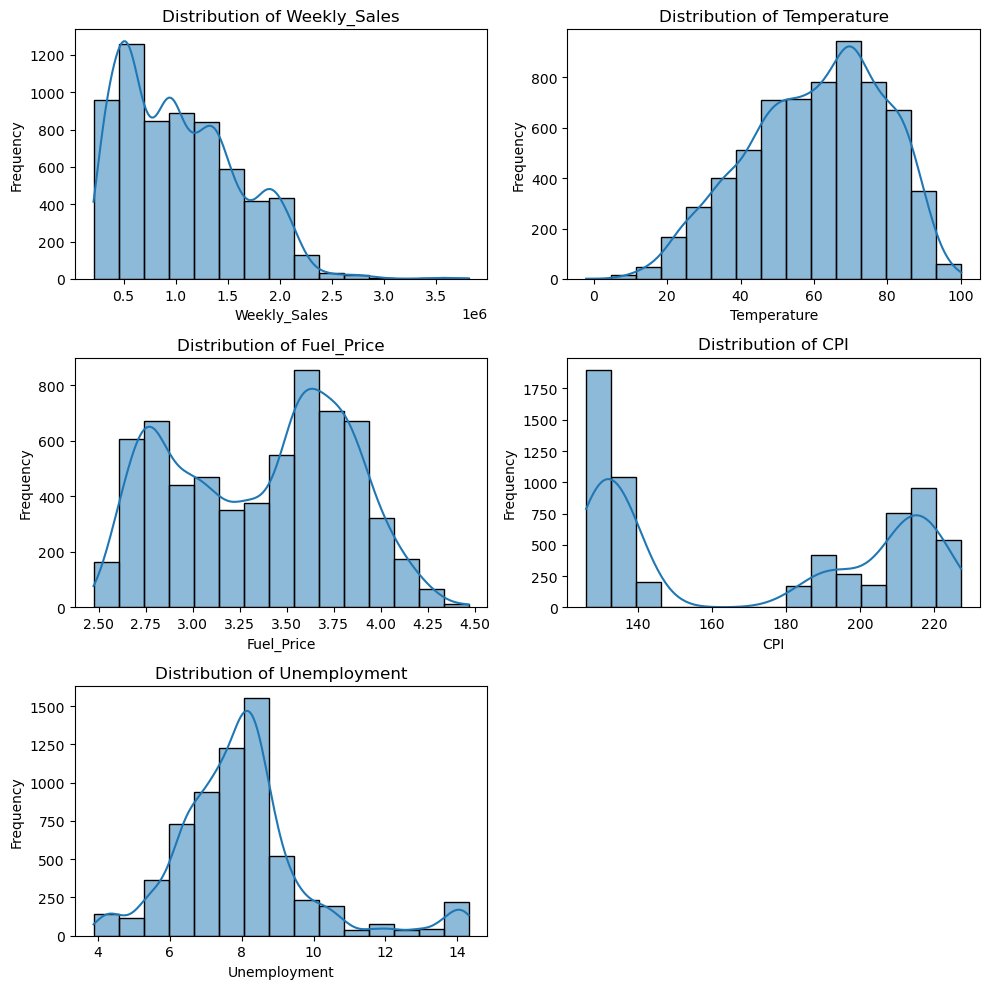

In [9]:
numericalData = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
plt.figure(figsize=(10,10))

for index,col in enumerate(numericalData):
    plt.subplot(3,2,index+1)
    sns.histplot(data=data,x=col,kde=True,bins=15)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
    

In [10]:
Holiday_Flag_counts=data['Holiday_Flag'].value_counts()
print(Holiday_Flag_counts)

0    5985
1     450
Name: Holiday_Flag, dtype: int64


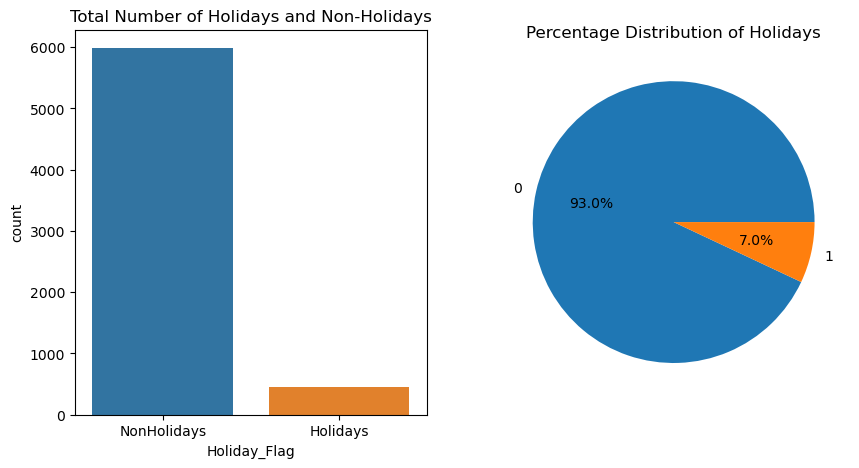

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(data=data,x='Holiday_Flag')
plt.xticks([0,1], ["NonHolidays", "Holidays"])
plt.title('Total Number of Holidays and Non-Holidays')
plt.subplot(1,2,2)
plt.pie(x=Holiday_Flag_counts,autopct='%1.1f%%',labels=Holiday_Flag_counts.index)
plt.title("Percentage Distribution of Holidays")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

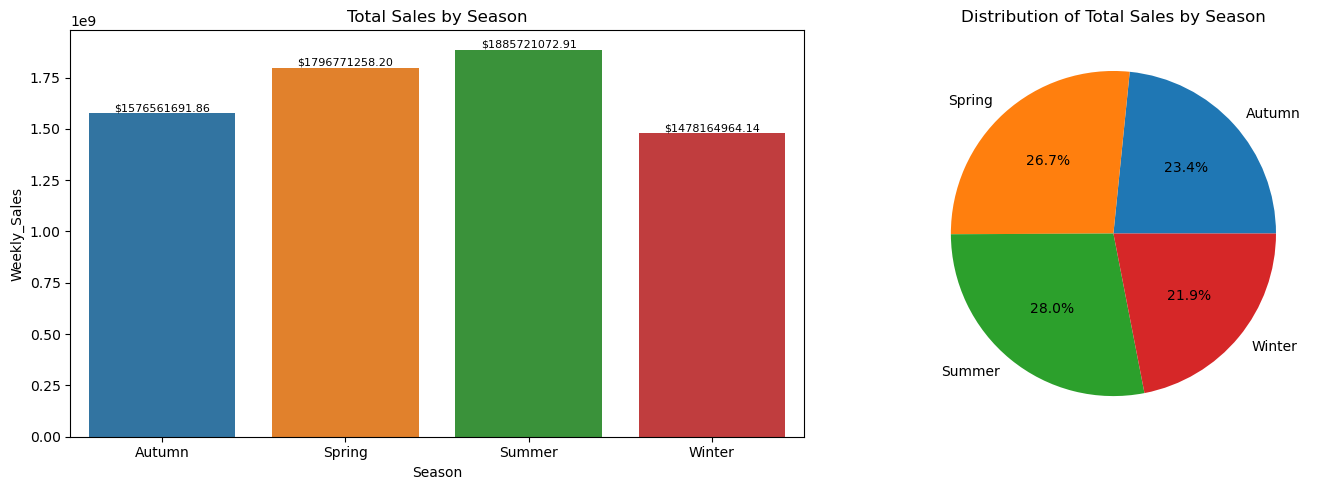

In [12]:
totalSalesBySeason=data.groupby('Season')['Weekly_Sales'].sum()
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data=data,x=totalSalesBySeason.index,y=totalSalesBySeason)
for i, (season, value) in enumerate(totalSalesBySeason.items()):
    plt.annotate('${:.2f}'.format(value), (i, value), ha='center', va='bottom', fontsize=8)
plt.title('Total Sales by Season')


plt.subplot(1,2,2)
plt.pie(data=data, x=totalSalesBySeason,labels=totalSalesBySeason.index,autopct='%1.1f%%')
plt.title('Distribution of Total Sales by Season')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

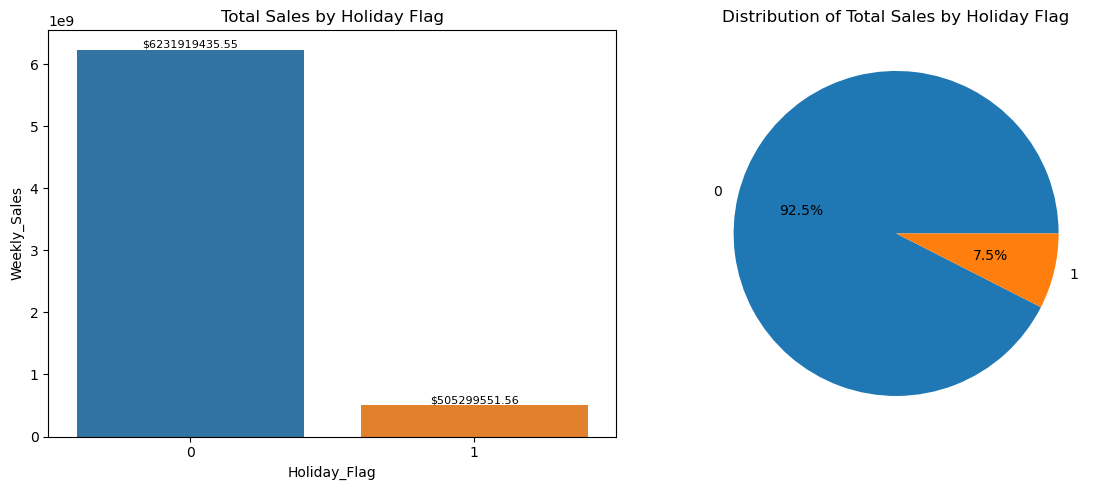

In [13]:
totalSalesByHolidayFlag=data.groupby('Holiday_Flag')['Weekly_Sales'].sum()
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(data=data,x=totalSalesByHolidayFlag.index,y=totalSalesByHolidayFlag)
for i, (HolidayFlag, value2) in enumerate(totalSalesByHolidayFlag.items()):
    plt.annotate('${:.2f}'.format(value2), (i, value2), ha='center', va='bottom', fontsize=8)
plt.title('Total Sales by Holiday Flag')   
plt.subplot(1,2,2)
plt.pie(data=data, x=totalSalesByHolidayFlag,labels=totalSalesByHolidayFlag.index,autopct='%1.1f%%')
plt.title('Distribution of Total Sales by Holiday Flag')
plt.tight_layout()
plt.show

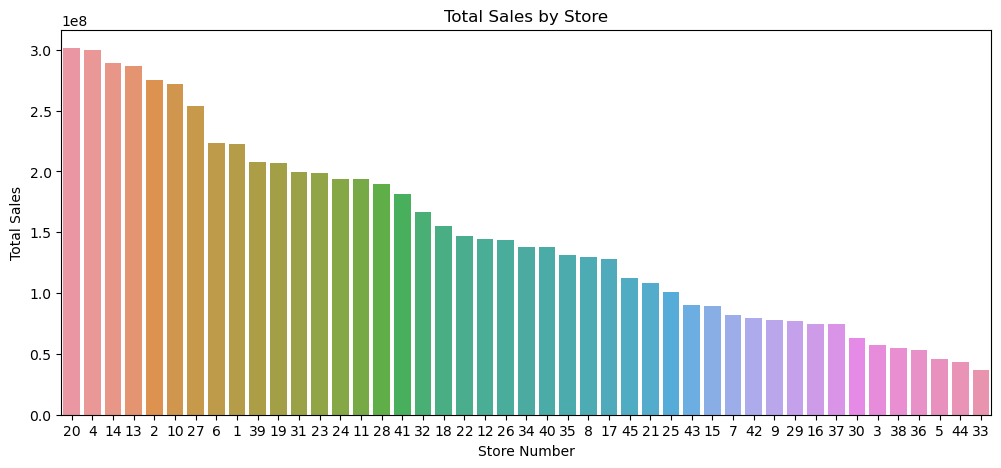

highest sales store:20, total sales:$301397792.46
lowest sales store:33, total sales:$37160221.96


In [14]:
totalSalesByStore = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 5))
sns.barplot(data=data, x=totalSalesByStore.index, y=totalSalesByStore,order=totalSalesByStore.index)
plt.title('Total Sales by Store')
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.show()
highestSalesStore=totalSalesByStore.idxmax()
highestSalesValue=totalSalesByStore.max()

lowestSalesStore=totalSalesByStore.idxmin()
lowesttSalesValue=totalSalesByStore.min()
print(f'highest sales store:{highestSalesStore}, total sales:${highestSalesValue}')
print(f'lowest sales store:{lowestSalesStore}, total sales:${lowesttSalesValue}')

C:\Users\ROMINA\AppData\Local\Temp\ipykernel_4796\764040433.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlationMap=data.corr()


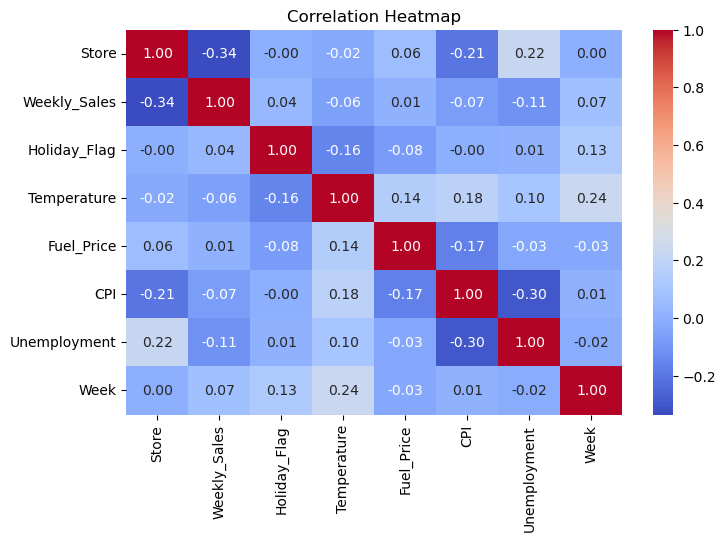

In [15]:
correlationMap=data.corr()
plt.figure(figsize=(8,5))
sns.heatmap(correlationMap,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Data Preprocessing

In [16]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Month_Name      0
Season          0
Week            0
dtype: int64

In [17]:
data.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Month_Name              object
Season                  object
Week                     int32
dtype: object

In [18]:
dataPreprocess = data.copy()
dataPreprocess.drop(['Date'], axis = 1, inplace = True)
dataPreprocess.dtypes

Store             int64
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Month_Name       object
Season           object
Week              int32
dtype: object

In [19]:
dataPreprocess['Store']=dataPreprocess['Store'].astype('object')
dataPreprocess['Week']=dataPreprocess['Week'].astype('object')
dataPreprocess['Holiday_Flag']=dataPreprocess['Holiday_Flag'].astype('object')
dataPreprocess.dtypes

Store            object
Weekly_Sales    float64
Holiday_Flag     object
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Month_Name       object
Season           object
Week             object
dtype: object

In [20]:
X = dataPreprocess.drop('Weekly_Sales', axis = 1)
y = dataPreprocess['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

numericalFeatures = dataPreprocess.select_dtypes('number').columns.to_list()
numericalFeatures.remove('Weekly_Sales')

categoricalFeatures = dataPreprocess.select_dtypes('object').columns.to_list()

print(f"Numerical Features  : {numericalFeatures}")
print(f"Categorical Features: {categoricalFeatures}")

Numerical Features  : ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
Categorical Features: ['Store', 'Holiday_Flag', 'Month_Name', 'Season', 'Week']


In [21]:
preprocessor = ColumnTransformer([('num_features', StandardScaler(), numericalFeatures),
                                  ('cat_features', BinaryEncoder(), categoricalFeatures),])

preprocessor.fit(X_train)

X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Model Building and Evaluation


# 1.Decision Tree Regressor

In [22]:
decisionTree_regressor = DecisionTreeRegressor()
decisionTree_regressor.fit(X_train_transformed,y_train)
y_predict=decisionTree_regressor.predict(X_train_transformed)
MAE=mean_absolute_error(y_train,y_predict)
MSE=mean_squared_error(y_train,y_predict)
RMSE=np.sqrt(MSE)
R2=r2_score(y_train,y_predict)
print(f"Mean Absolute Error    : {MAE}")
print(f"Mean Squared Error     : {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"\nR2 Score: {R2}")

Mean Absolute Error    : 0.0
Mean Squared Error     : 0.0
Root Mean Squared Error: 0.0

R2 Score: 1.0


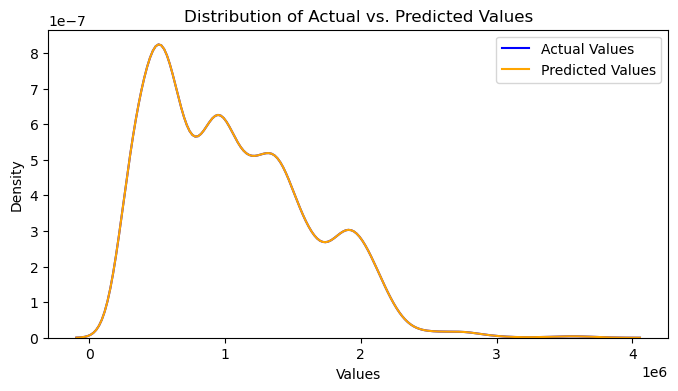

In [23]:
plt.figure(figsize=(8,4))
sns.kdeplot(x=y_train,color='blue',label='Actual Values')
sns.kdeplot(x=y_predict,color='orange',label='Predicted Values')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of Actual vs. Predicted Values')
plt.legend()
plt.show()

# 2.Random Forest Regressor

Mean Absolute Error    : 25695.7573068182
Mean Squared Error     : 2297581621.9695015
Root Mean Squared Error: 47933.09526798266

R2 Score: 0.9927639148889226


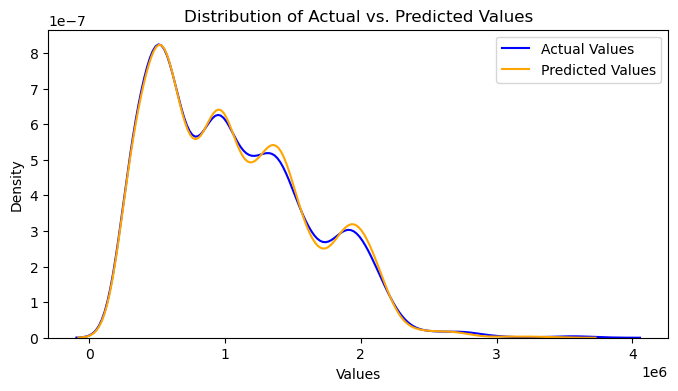

In [24]:
randomForest_regressor = RandomForestRegressor()
randomForest_regressor.fit(X_train_transformed,y_train)
y_predict=randomForest_regressor.predict(X_train_transformed)
MAE=mean_absolute_error(y_train,y_predict)
MSE=mean_squared_error(y_train,y_predict)
RMSE=np.sqrt(MSE)
R2=r2_score(y_train,y_predict)
print(f"Mean Absolute Error    : {MAE}")
print(f"Mean Squared Error     : {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"\nR2 Score: {R2}")
plt.figure(figsize=(8,4))
sns.kdeplot(x=y_train,color='blue',label='Actual Values')
sns.kdeplot(x=y_predict,color='orange',label='Predicted Values')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of Actual vs. Predicted Values')
plt.legend()
plt.show()

# 3.XGB Regressor

Mean Absolute Error    : 28017.820711198525
Mean Squared Error     : 1583487170.899722
Root Mean Squared Error: 39793.054304736674

R2 Score: 0.9950129092993408


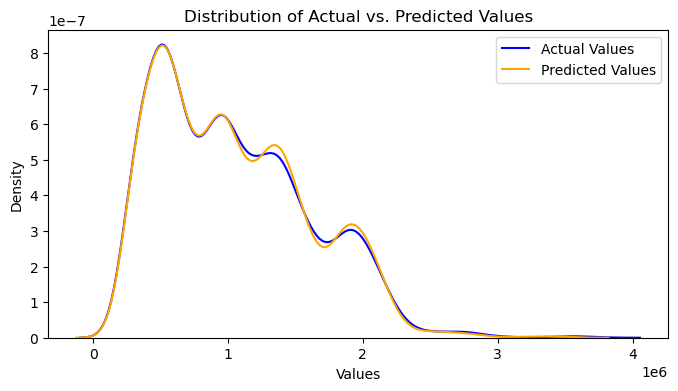

In [25]:
XGB_regressor = XGBRegressor()
XGB_regressor.fit(X_train_transformed,y_train)
y_predict=XGB_regressor.predict(X_train_transformed)
MAE=mean_absolute_error(y_train,y_predict)
MSE=mean_squared_error(y_train,y_predict)
RMSE=np.sqrt(MSE)
R2=r2_score(y_train,y_predict)
print(f"Mean Absolute Error    : {MAE}")
print(f"Mean Squared Error     : {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"\nR2 Score: {R2}")
plt.figure(figsize=(8,4))
sns.kdeplot(x=y_train,color='blue',label='Actual Values')
sns.kdeplot(x=y_predict,color='orange',label='Predicted Values')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of Actual vs. Predicted Values')
plt.legend()
plt.show()

# 1. Decision Tree Regressor

In [26]:
dt_parameter={'max_depth':np.arange(2,15),'min_samples_split':[10,20,30,40,50,100,200,300]}
grid_search=GridSearchCV(estimator=decisionTree_regressor,param_grid=dt_parameter,cv=5,scoring='r2')
grid_search.fit(X_train_transformed,y_train)
bestParameters=grid_search.best_params_
bestScore=grid_search.best_score_
decisionTree_regressor_tuned=grid_search.best_estimator_
print(f"Best parameters: {bestParameters} \n")
print(f"Best R2 score  : {bestScore}")

Best parameters: {'max_depth': 14, 'min_samples_split': 40} 

Best R2 score  : 0.9188543010960938


In [27]:
decisionTree_regressor_tuned.fit(X_train_transformed,y_train)
y_predict=decisionTree_regressor_tuned.predict(X_train_transformed)
MAE=mean_absolute_error(y_train,y_predict)
MSE=mean_squared_error(y_train,y_predict)
RMSE=np.sqrt(MSE)
R2=r2_score(y_train,y_predict)
print(f"Mean Absolute Error    : {MAE}")
print(f"Mean Squared Error     : {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"\nR2 Score: {R2}")

Mean Absolute Error    : 68246.12428752006
Mean Squared Error     : 16315998228.682173
Root Mean Squared Error: 127734.09188107212

R2 Score: 0.9486138160551059


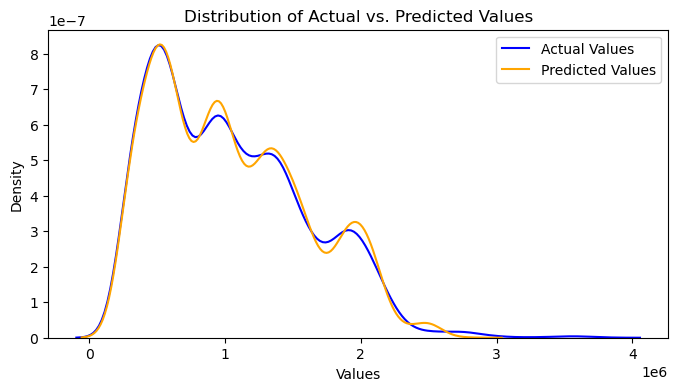

In [28]:
plt.figure(figsize=(8,4))
sns.kdeplot(x=y_train,color='blue',label='Actual Values')
sns.kdeplot(x=y_predict,color='orange',label='Predicted Values')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of Actual vs. Predicted Values')
plt.legend()
plt.show()

In [29]:
crossValScore=cross_val_score(estimator=decisionTree_regressor_tuned, X=X_train_transformed, y=y_train,scoring='r2',cv=5)
print(f"\nCross Validation Scores r2: {crossValScore}")
print(f"\nMean              : {crossValScore.mean() * 100:.2f}%")
print(f"Standard Deviation: {crossValScore.std()}")


Cross Validation Scores r2: [0.91649607 0.91753015 0.91659444 0.90698831 0.93479376]

Mean              : 91.85%
Standard Deviation: 0.0090176638846543


# 2. Random Forest Regressor

In [30]:
rf_parameter={'max_depth':np.arange(2,15),'n_estimators':np.arange(25,101,25)}
grid_search=GridSearchCV(estimator=randomForest_regressor,param_grid=rf_parameter,cv=5,scoring='r2')
grid_search.fit(X_train_transformed,y_train)
bestParameters=grid_search.best_params_
bestScore=grid_search.best_score_
randomForest_regressor_tuned=grid_search.best_estimator_
print(f"Best parameters: {bestParameters} \n")
print(f"Best R2 score  : {bestScore}")

Best parameters: {'max_depth': 13, 'n_estimators': 75} 

Best R2 score  : 0.9404932899235456


In [31]:
randomForest_regressor_tuned.fit(X_train_transformed,y_train)
y_predict=randomForest_regressor_tuned.predict(X_train_transformed)
MAE=mean_absolute_error(y_train,y_predict)
MSE=mean_squared_error(y_train,y_predict)
RMSE=np.sqrt(MSE)
R2=r2_score(y_train,y_predict)
print(f"Mean Absolute Error    : {MAE}")
print(f"Mean Squared Error     : {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"\nR2 Score: {R2}")

Mean Absolute Error    : 30696.92796969451
Mean Squared Error     : 2873139082.4856277
Root Mean Squared Error: 53601.67051954284

R2 Score: 0.9909512337938152


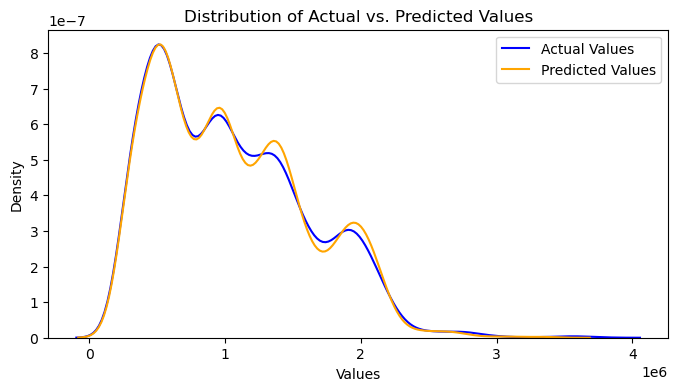

In [32]:
plt.figure(figsize=(8,4))
sns.kdeplot(x=y_train,color='blue',label='Actual Values')
sns.kdeplot(x=y_predict,color='orange',label='Predicted Values')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of Actual vs. Predicted Values')
plt.legend()
plt.show()

In [33]:
crossValScore=cross_val_score(estimator=randomForest_regressor_tuned, X=X_train_transformed, y=y_train,scoring='r2',cv=5)
print(f"\nCross Validation Scores r2: {crossValScore}")
print(f"\nMean              : {crossValScore.mean() * 100:.2f}%")
print(f"Standard Deviation: {crossValScore.std()}")


Cross Validation Scores r2: [0.9361417  0.94376871 0.94048729 0.92908821 0.95332309]

Mean              : 94.06%
Standard Deviation: 0.008053830261697738


# 3.XGB regressor

In [34]:
xgb_parameter={'max_depth':np.arange(2,15),'n_estimators':np.arange(25,101,25)}
grid_search=GridSearchCV(estimator=XGB_regressor,param_grid=xgb_parameter,cv=5,scoring='r2')
grid_search.fit(X_train_transformed,y_train)
bestParameters=grid_search.best_params_
bestScore=grid_search.best_score_
xgb_regressor_tuned=grid_search.best_estimator_
print(f"Best parameters: {bestParameters} \n")
print(f"Best R2 score  : {bestScore}")

Best parameters: {'max_depth': 8, 'n_estimators': 100} 

Best R2 score  : 0.9672802879056694


In [35]:
xgb_regressor_tuned.fit(X_train_transformed,y_train)
y_predict=xgb_regressor_tuned.predict(X_train_transformed)
MAE=mean_absolute_error(y_train,y_predict)
MSE=mean_squared_error(y_train,y_predict)
RMSE=np.sqrt(MSE)
R2=r2_score(y_train,y_predict)
print(f"Mean Absolute Error    : {MAE}")
print(f"Mean Squared Error     : {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"\nR2 Score: {R2}")

Mean Absolute Error    : 11046.52782488345
Mean Squared Error     : 254432961.64278126
Root Mean Squared Error: 15950.954881848962

R2 Score: 0.999198679799705


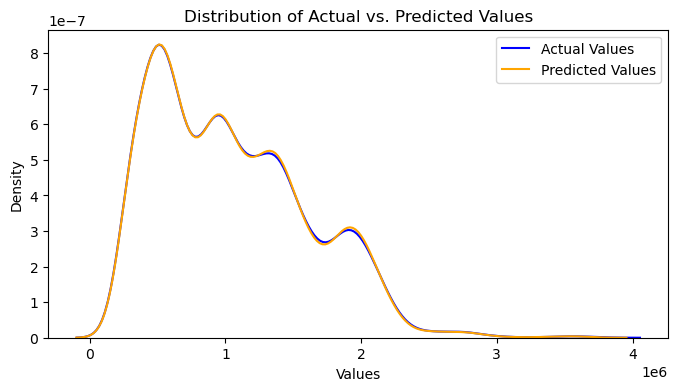

In [36]:
plt.figure(figsize=(8,4))
sns.kdeplot(x=y_train,color='blue',label='Actual Values')
sns.kdeplot(x=y_predict,color='orange',label='Predicted Values')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution of Actual vs. Predicted Values')
plt.legend()
plt.show()

# Final Evaluation

In [37]:
print("\nTesting the tuned Decision Tree Regressor\n")
y_predict=decisionTree_regressor_tuned.predict(X_test_transformed)
MAE=mean_absolute_error(y_test,y_predict)
MSE=mean_squared_error(y_test,y_predict)
RMSE=np.sqrt(MSE)
R2=r2_score(y_test,y_predict)
print(f"Mean Absolute Error    : {MAE}")
print(f"Mean Squared Error     : {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"\nR2 Score: {R2}")


Testing the tuned Decision Tree Regressor

Mean Absolute Error    : 83080.24868001978
Mean Squared Error     : 24089955356.867306
Root Mean Squared Error: 155209.39197376976

R2 Score: 0.9252223683862563


In [38]:
print("\nTesting the tuned Random Forest Regressor\n")
y_predict=randomForest_regressor_tuned.predict(X_test_transformed)
MAE=mean_absolute_error(y_test,y_predict)
MSE=mean_squared_error(y_test,y_predict)
RMSE=np.sqrt(MSE)
R2=r2_score(y_test,y_predict)
print(f"Mean Absolute Error    : {MAE}")
print(f"Mean Squared Error     : {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"\nR2 Score: {R2}")


Testing the tuned Random Forest Regressor

Mean Absolute Error    : 71211.83906414076
Mean Squared Error     : 16994291035.13199
Root Mean Squared Error: 130362.15338483785

R2 Score: 0.9472480203580127


In [39]:
print("\nTesting the tuned xgb Regressor\n")
y_predict=xgb_regressor_tuned.predict(X_test_transformed)
MAE=mean_absolute_error(y_test,y_predict)
MSE=mean_squared_error(y_test,y_predict)
RMSE=np.sqrt(MSE)
R2=r2_score(y_test,y_predict)
print(f"Mean Absolute Error    : {MAE}")
print(f"Mean Squared Error     : {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"\nR2 Score: {R2}")


Testing the tuned xgb Regressor

Mean Absolute Error    : 59918.92093531469
Mean Squared Error     : 9347367586.902597
Root Mean Squared Error: 96681.78518677961

R2 Score: 0.9709848358115618
